<a href="https://colab.research.google.com/github/massinoLight/HandwrittenSignatureForgeryDetectionUsingCNN/blob/master/Handwritten_Signature_Forgery_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 27.0MB/s 


In [2]:
from tensorflow.keras import layers
import tensorflow_addons as tfa
import pathlib
import os
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/massinoLight/HandwrittenSignatureForgeryDetectionUsingCNN/blob/master/datasets.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')



3694592/3693213 [==============================] - 0s 0us/step


In [3]:
!rm -rf /content/datasets/__MACOSX/

In [4]:
url_valide = r'http://7agestion.fr/wp-content/uploads/2017/03/ok-2282499_640.png'
resp = requests.get(url_valide, stream=True).raw
image_array_valide = np.asarray(bytearray(resp.read()), dtype="uint8")

image_valide = cv2.imdecode(image_array_valide, cv2.IMREAD_COLOR)


url_fake = r'https://png.pngtree.com/png-clipart/20190924/original/pngtree-false-free-png-png-image_4863857.jpg'
resp = requests.get(url_fake, stream=True).raw
image_array_fake = np.asarray(bytearray(resp.read()), dtype="uint8")

image_fake = cv2.imdecode(image_array_fake, cv2.IMREAD_COLOR)


In [5]:
import pathlib
import os
import tensorflow as tf
data_dir = pathlib.Path('/content/datasets/datasets')
print(data_dir)
print(os.path.abspath(data_dir))

totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(data_dir):
    
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

#image_count = len(list(data_dir.glob('*/')))
print(str(totalDir)+" Dossiers")
print(str(totalFiles)+" Fichiers")

/content/datasets/datasets
/content/datasets/datasets
2 Dossiers
49 Fichiers


In [6]:
batch_size = 1
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 48 files belonging to 2 classes.
Using 39 files for training.
Found 48 files belonging to 2 classes.
Using 9 files for validation.
['Sig1Fake', 'Sig1Orig']


**Le premier modéle qui a les meilleurs résultats**

In [11]:


#le on définie le nombre de classes ici nous disposons de 2 Forgery et Genuine  pour la signataire 1 
num_classes = 2

#modéle 1 un standard 
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3),
                         activation=tfa.activations.gelu),
  tfa.layers.GroupNormalization(groups=5, axis=3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
#Modéle 2  (ici avec 2 couches )

num_classes = 2

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#Modéle 3 avec Atrous Spatial Pyramid Pooling

num_classes = 2
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(64,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(32,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(16,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, epochs=10, 
                    validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:80: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


39/39 [==============================] - 1s 14ms/step - loss: 248.9836 - accuracy: 0.6355 - val_loss: 20.5075 - val_accuracy: 0.5556
Epoch 2/10
39/39 [==============================] - 0s 8ms/step - loss: 143.5125 - accuracy: 0.5118 - val_loss: 16.3791 - val_accuracy: 0.4444
Epoch 3/10
39/39 [==============================] - 0s 8ms/step - loss: 64.8571 - accuracy: 0.7514 - val_loss: 6.8366 - val_accuracy: 0.4444
Epoch 4/10
39/39 [==============================] - 0s 8ms/step - loss: 4.6112 - accuracy: 0.8594 - val_loss: 110.1796 - val_accuracy: 0.4444
Epoch 5/10
39/39 [==============================] - 0s 8ms/step - loss: 47.8571 - accuracy: 0.5577 - val_loss: 76.7849 - val_accuracy: 0.4444
Epoch 6/10
39/39 [==============================] - 0s 8ms/step - loss: 20.8125 - accuracy: 0.8615 - val_loss: 26.2033 - val_accuracy: 0.6667
Epoch 7/10
39/39 [==============================] - 0s 8ms/step - loss: 2.2112 - accuracy: 0.9630 - val_loss: 29.7730 - val_accuracy: 0.4444
Epoch 8/10
39/39

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 10)      280       
_________________________________________________________________
group_normalization_1 (Group (None, 198, 198, 10)      20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 392040)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 784082    
Total params: 784,382
Trainable params: 784,382
Non-trainable params: 0
_________________________________________________________________


Saving original_1_7.png to original_1_7.png


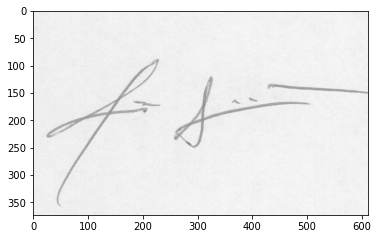

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1]
[[0. 1.]]
[[0. 1.]]
[1]


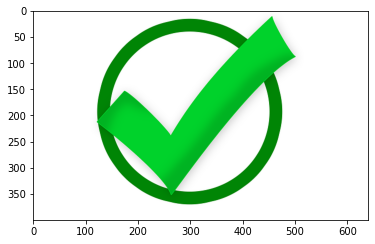

ce est une vrai !


In [21]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict_classes(img_to_predict)
    
    print(model.predict(img_to_predict))
    print(res)
    if res == 1:
        plt.imshow(cv2.cvtColor(image_valide, cv2.COLOR_BGR2RGB))
        plt.show()
        print("ce est une vrai !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_fake, cv2.COLOR_BGR2RGB))
        plt.show()
        print("c'est une fausse  !")

**Second Modéle avec SSP ne donne pas un bon resultat**

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa


# TFA layers and activations
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3),
                         activation=tfa.activations.gelu),
  tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# TFA optimizers, losses and metrics
model.compile(
    optimizer=tfa.optimizers.RectifiedAdam(0.001),
    loss=tfa.losses.TripletSemiHardLoss(),
    metrics=[tfa.metrics.MultiLabelConfusionMatrix(num_classes=10)])

history = model.fit(train_data, epochs=20, 
                    validation_data=val_data)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:80: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


39/39 [==============================] - 2s 18ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabel_confusion_matrix: 2.2500
Epoch 2/10
39/39 [==============================] - 0s 11ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabel_confusion_matrix: 2.2500
Epoch 3/10
39/39 [==============================] - 0s 11ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabel_confusion_matrix: 2.2500
Epoch 4/10
39/39 [==============================] - 0s 11ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabel_confusion_matrix: 2.2500
Epoch 5/10
39/39 [==============================] - 0s 11ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabel_confusion_matrix: 2.2500
Epoch 6/10
39/39 [==============================] - 0s 11ms/step - loss: nan - Multilabel_confusion_matrix: 5.1188 - val_loss: nan - val_Multilabe

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 10)      280       
_________________________________________________________________
spatial_pyramid_pooling2d_9  (None, 35, 10)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 350)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3510      
Total params: 3,790
Trainable params: 3,790
Non-trainable params: 0
_________________________________________________________________


Saving original_1_1.png to original_1_1.png


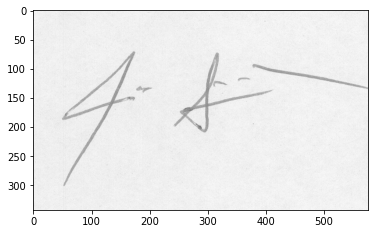

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:80: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


[0]
[[nan nan nan nan nan nan nan nan nan nan]]
[0]


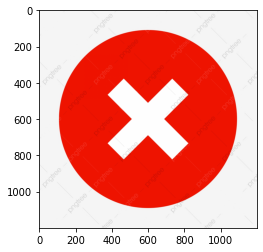

c'est une fausse  !


In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict_classes(img_to_predict)
    print(model.predict_classes(img_to_predict))
    print(model.predict(img_to_predict))
    print(res)
    if res == 1:
        plt.imshow(cv2.cvtColor(image_valide, cv2.COLOR_BGR2RGB))
        plt.show()
        print("ce est une vrai !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_fake, cv2.COLOR_BGR2RGB))
        plt.show()
        print("c'est une fausse  !")

In [ ]:
#Modéle 3 avec Inception V3

num_classes = 2
model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

# TFA optimizers, losses and metrics
model.compile(
    optimizer=tfa.optimizers.RectifiedAdam(0.001),
    loss=tfa.losses.TripletSemiHardLoss(),
    metrics=[tfa.metrics.MultiLabelConfusionMatrix(num_classes=10)])

history = model.fit(train_data, epochs=20, 
                    validation_data=val_data)


Epoch 1/20


ValueError: ignored

In [ ]:
#Modéle 3 avec Atrous Spatial Pyramid Pooling

num_classes = 2
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(64,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(32,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Conv2D(16,4, activation='relu'),
    tfa.layers.SpatialPyramidPooling2D([1, 3, 5]),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 10)      280       
_________________________________________________________________
spatial_pyramid_pooling2d_4  (None, 35, 10)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 350)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3510      
Total params: 3,790
Trainable params: 3,790
Non-trainable params: 0
_________________________________________________________________
